In [128]:
import gym
from gym.utils.play import play

import matplotlib.pyplot as plt
%matplotlib inline

# Imports specifically so we can render outputs in Jupyter.
from matplotlib import animation
from IPython.display import display

pygame 1.9.6
Hello from the pygame community. https://www.pygame.org/contribute.html


In [ ]:
a = input()
print(a)

In [1]:
#implementing Upper Confidence Bound (UCB)

import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import math

dataset = pd.read_csv('./Ads_CTR_Optimisation.csv')
dataset.head(10)

,Ad 1,Ad 2,Ad 3,Ad 4,Ad 5,Ad 6,Ad 7,Ad 8,Ad 9,Ad 10
0,1,0,0,0,1,0,0,0,1,0
1,0,0,0,0,0,0,0,0,1,0
2,0,0,0,0,0,0,0,0,0,0
3,0,1,0,0,0,0,0,1,0,0
4,0,0,0,0,0,0,0,0,0,0
5,1,1,0,0,0,0,0,0,0,0
6,0,0,0,1,0,0,0,0,0,0
7,1,1,0,0,1,0,0,0,0,0
8,0,0,0,0,0,0,0,0,0,0
9,0,0,1,0,0,0,0,0,0,0


<BarContainer object of 10 artists>

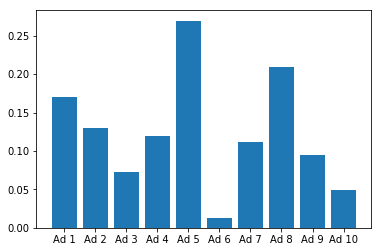

In [14]:
plt.bar(x = dataset.columns, height = (dataset.sum()/dataset.count()))

In [ ]:
# This is an alteration on UCB which incorporates all data, not leaving out some.

N = 10000
d = 10
ads_selected = []
numbers_of_selections = [0] * d
sums_of_rewards = [0] * d
total_reward = 0

for n in range(0, N):
    ad = 0
    max_upper_bound = 0
    for i in range(0, d):
        numbers_of_selections[i] = numbers_of_selections[i] + 1
        reward = dataset.values[n, i]
        sums_of_rewards[i] = sums_of_rewards[i] + reward
        total_reward = total_reward + reward
        average_reward = sums_of_rewards[i] / numbers_of_selections[i]
        delta_i = math.sqrt(3/2 * (math.log(n + 1) / numbers_of_selections[i]))
        upper_bound = average_reward + delta_i
        if upper_bound > max_upper_bound:
            ad = i
            max_upper_bound = upper_bound
    ads_selected.append(ad)

#Visualizing the result
plt.hist(ads_selected) #histogram of number of times each ad is clicked
plt.title('Histogram of ads_selected')
plt.xlabel('Ad No')
plt.ylabel('Number of times each add is selected')
plt.show()
from collections import Counter
print(Counter(ads_selected))
print([[x,ads_selected.count(x)] for x in set(ads_selected)])
#to view the reward
print(total_reward)

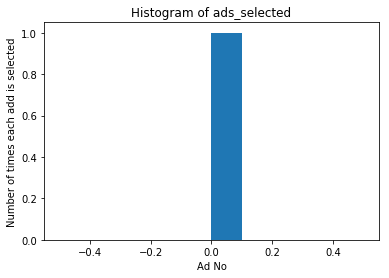

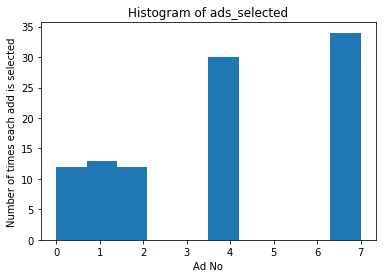

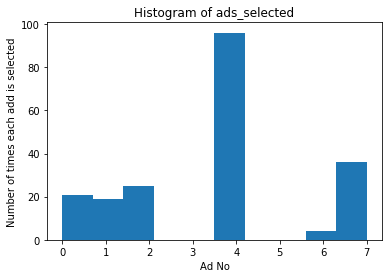

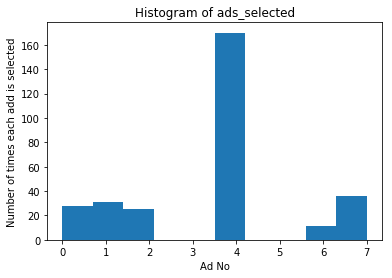

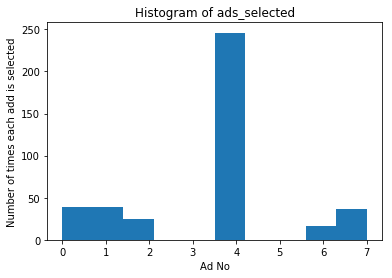

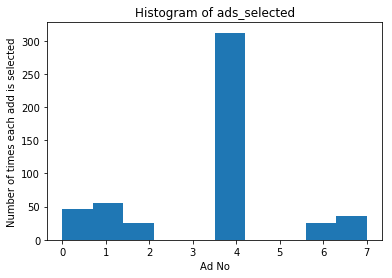

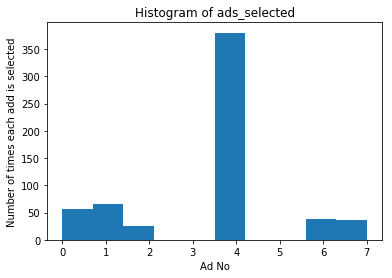

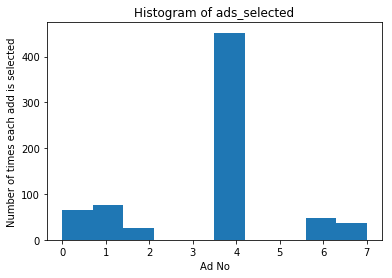

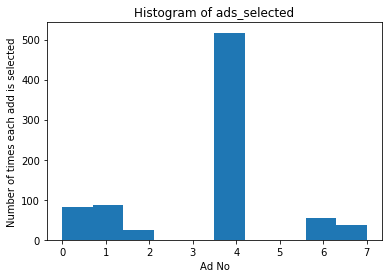

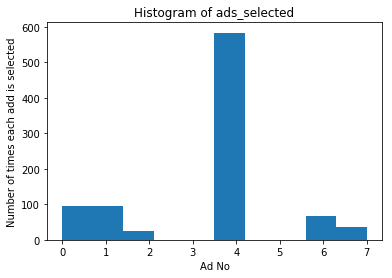

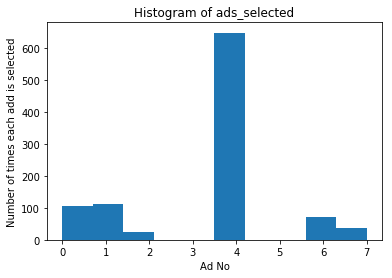

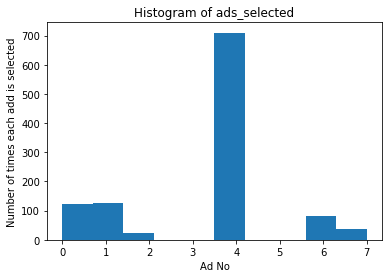

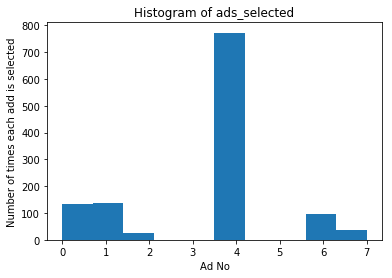

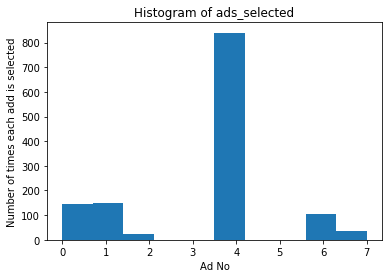

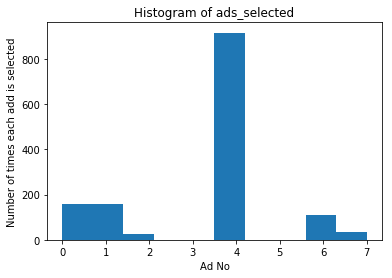

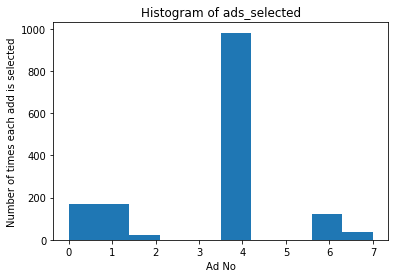

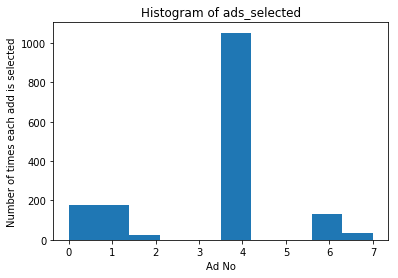

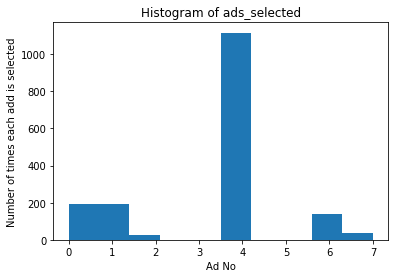

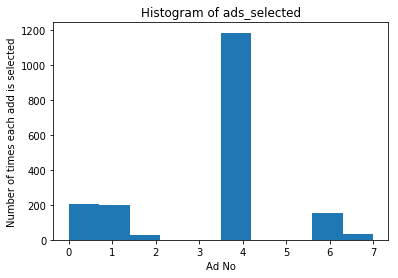

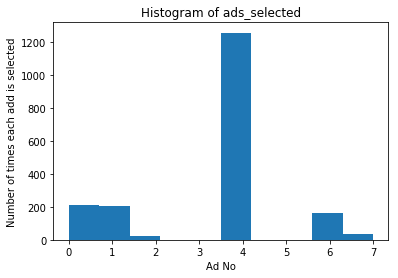

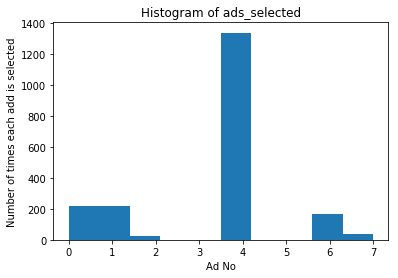

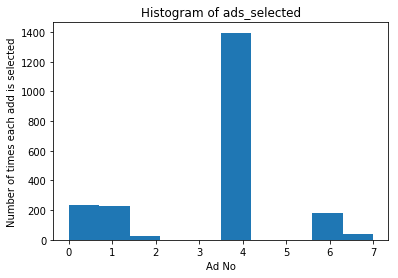

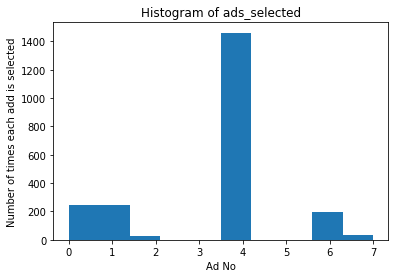

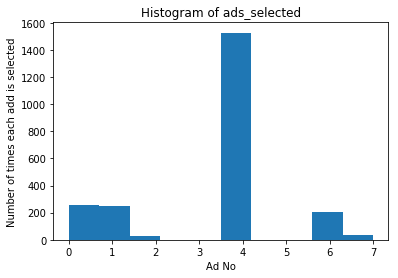

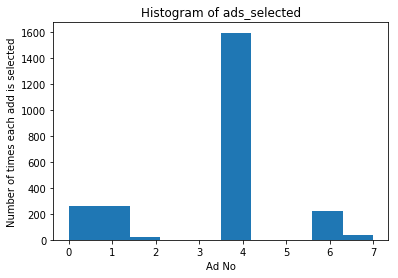

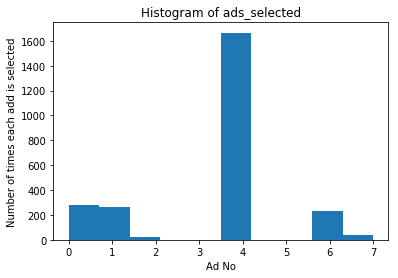

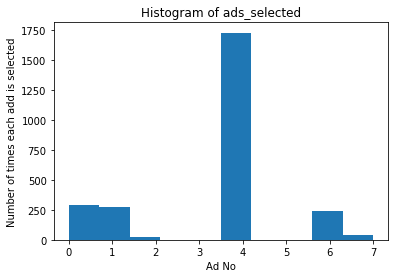

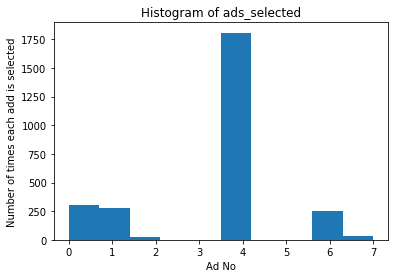

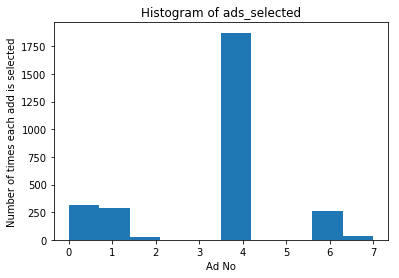

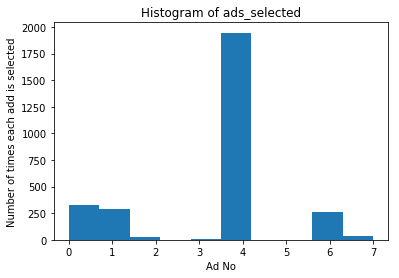

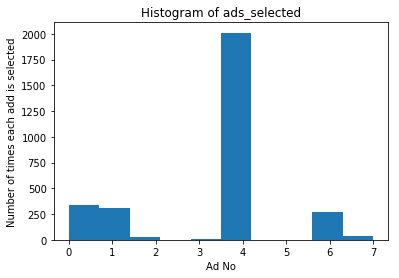

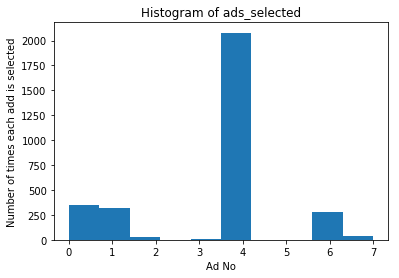

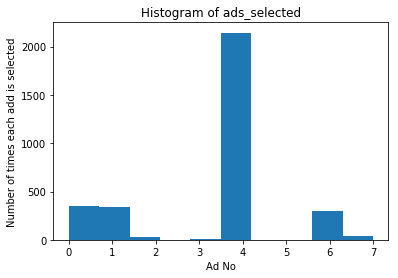

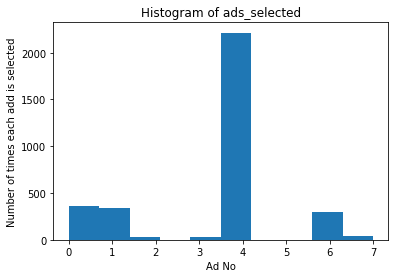

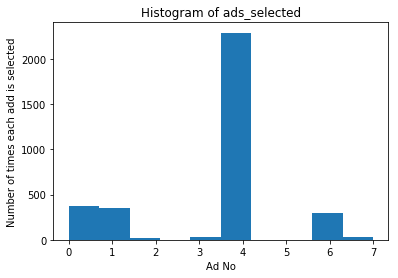

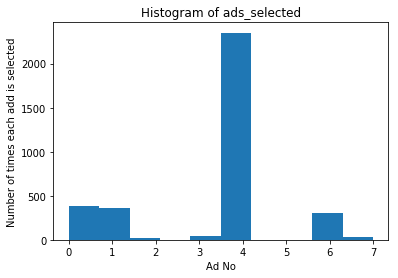

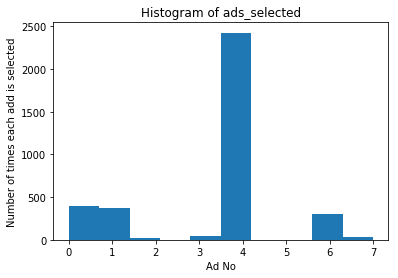

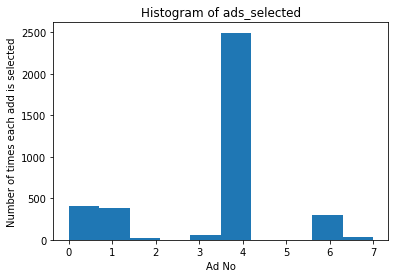

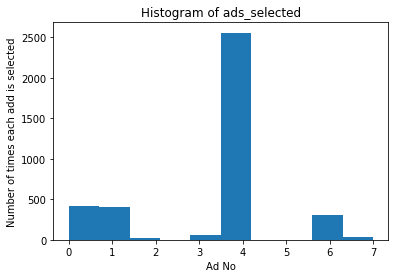

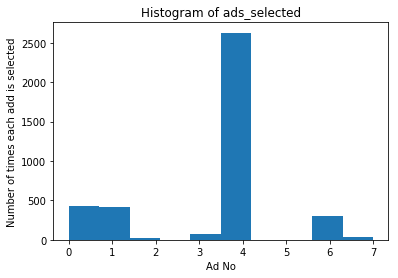

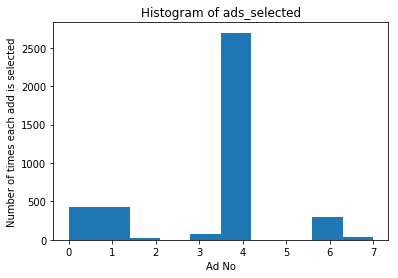

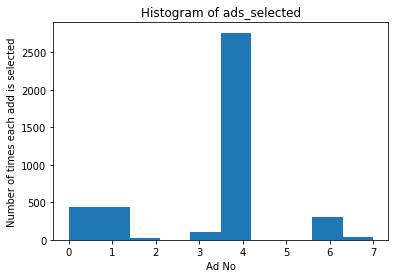

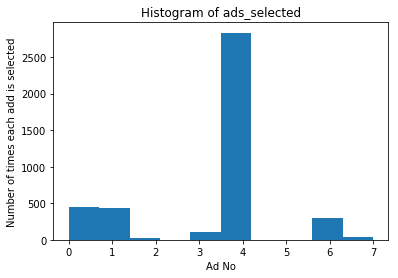

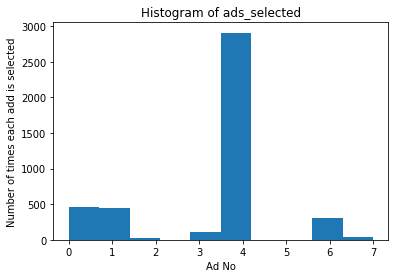

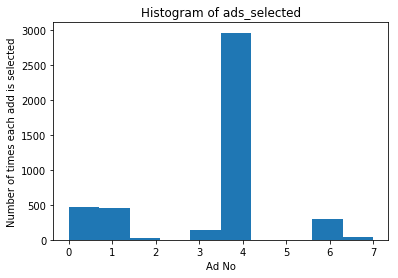

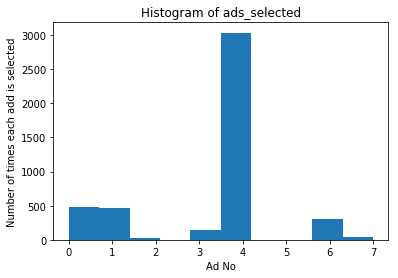

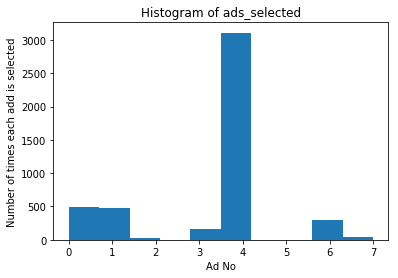

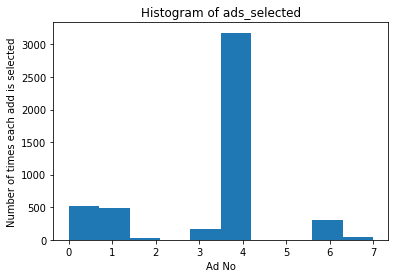

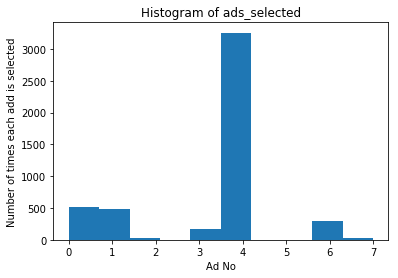

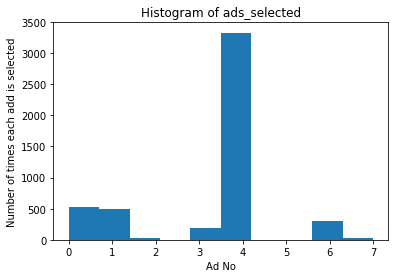

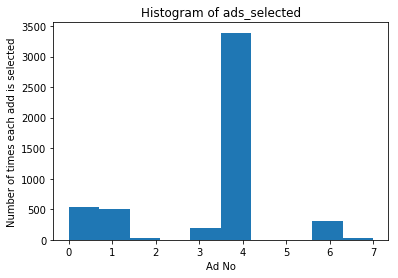

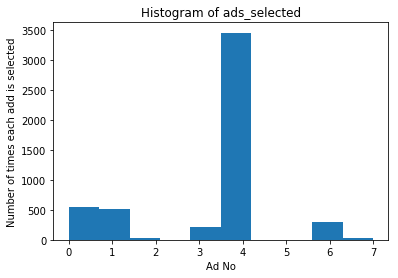

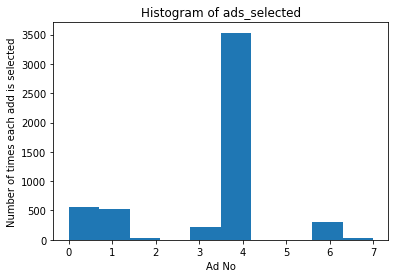

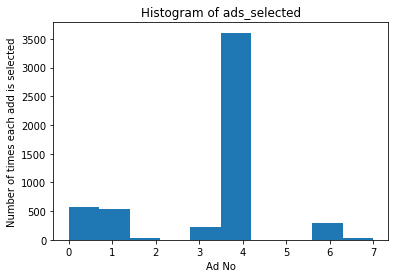

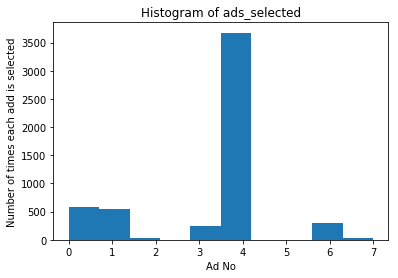

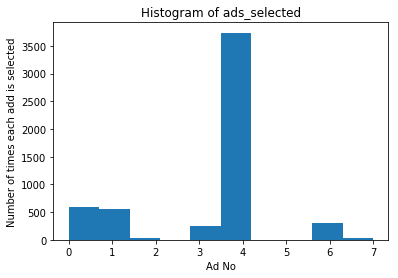

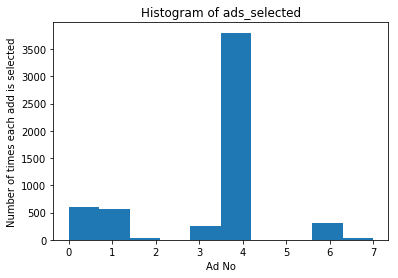

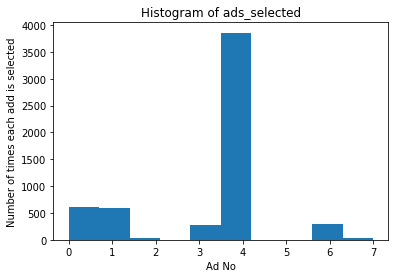

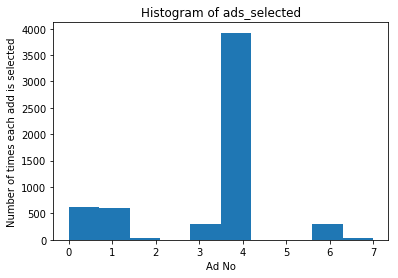

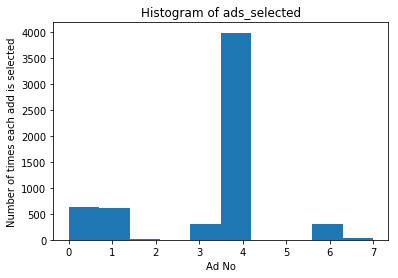

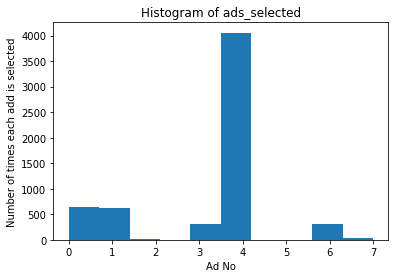

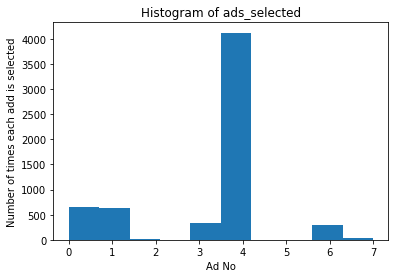

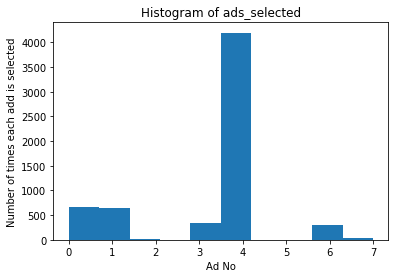

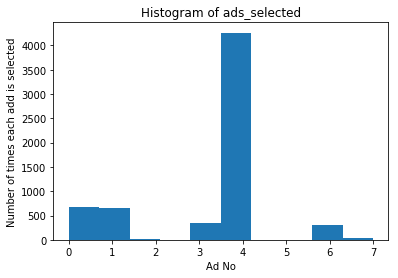

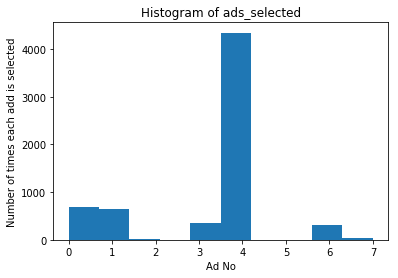

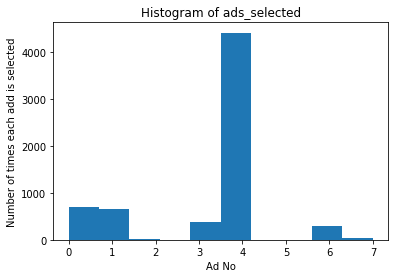

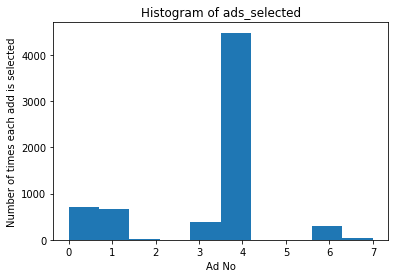

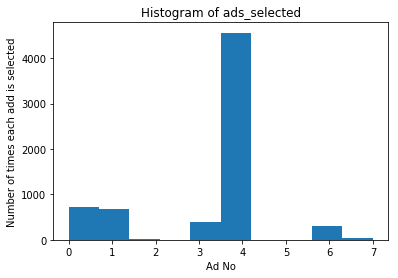

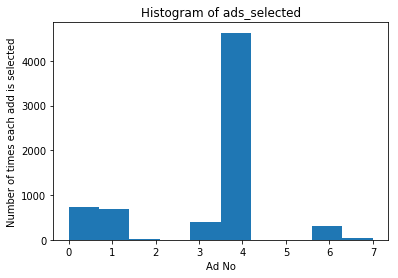

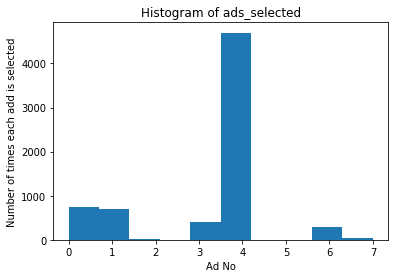

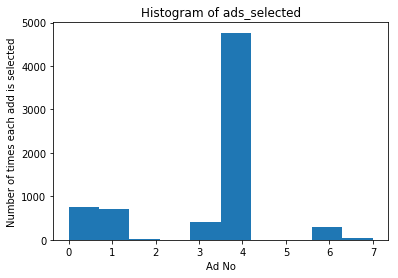

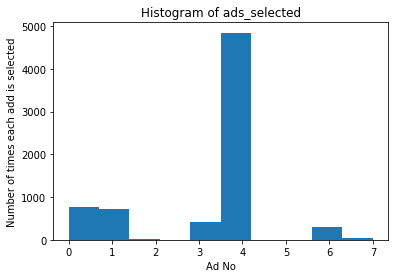

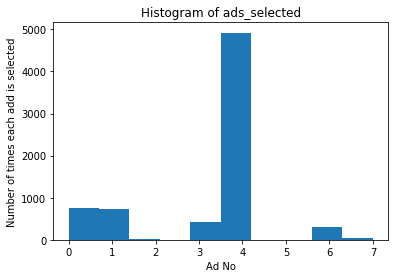

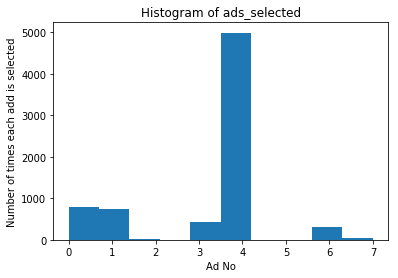

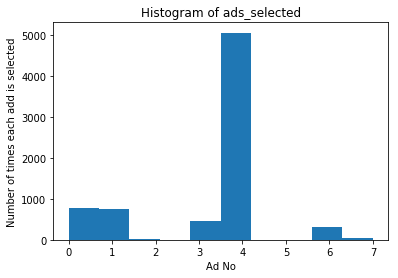

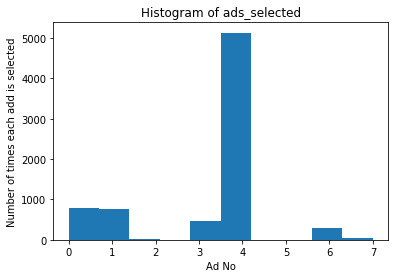

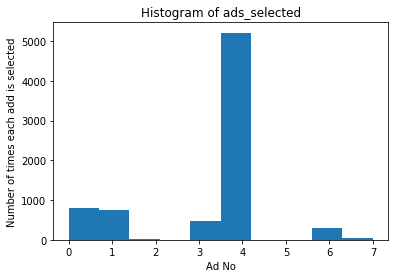

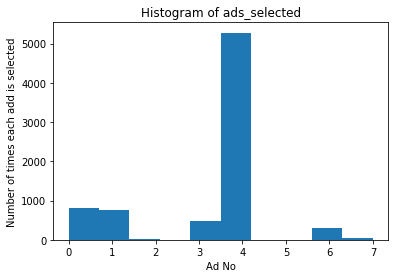

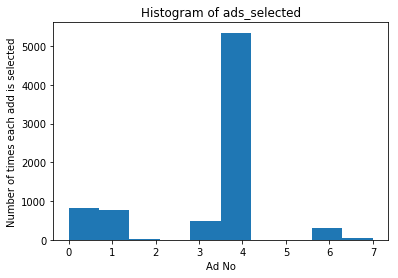

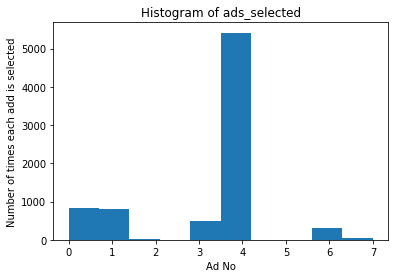

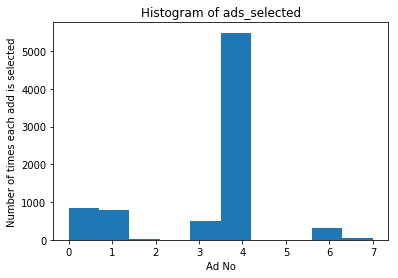

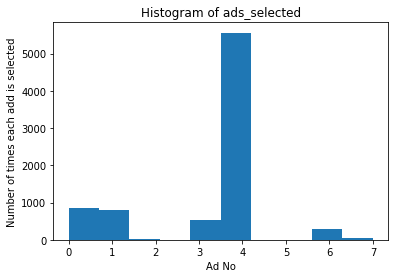

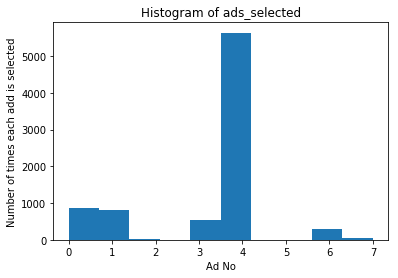

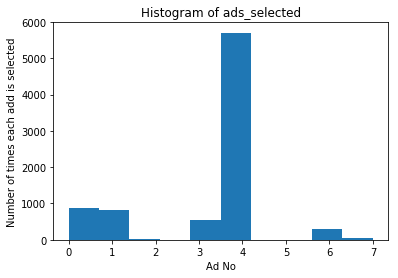

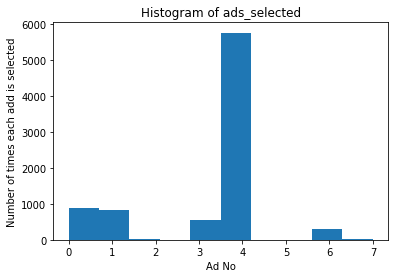

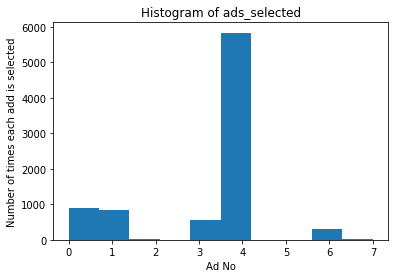

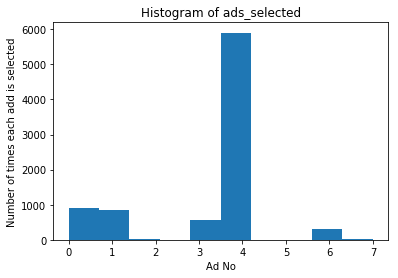

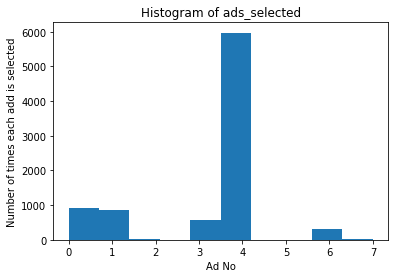

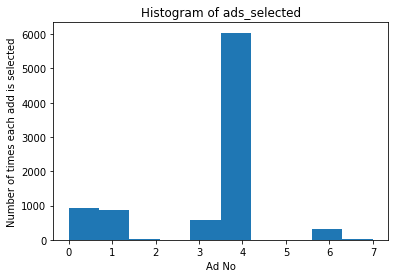

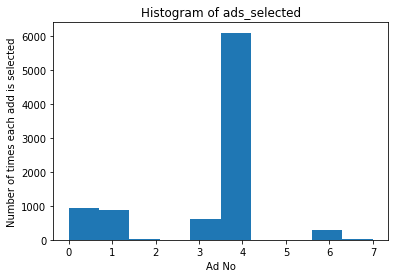

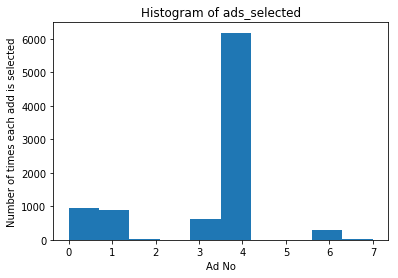

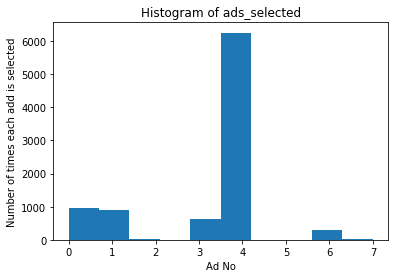

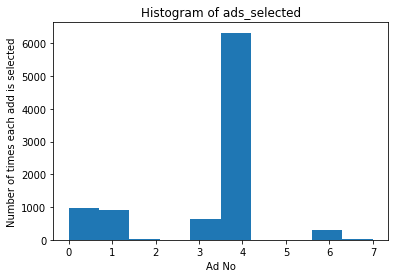

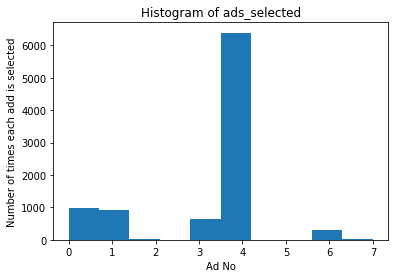

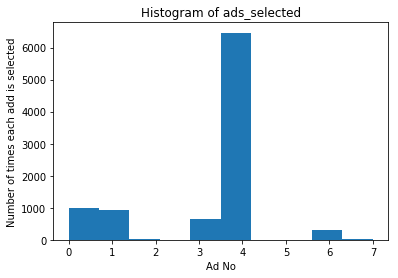

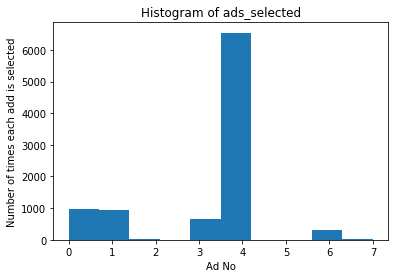

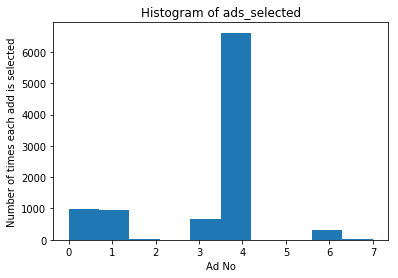

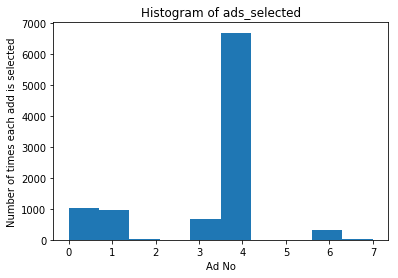

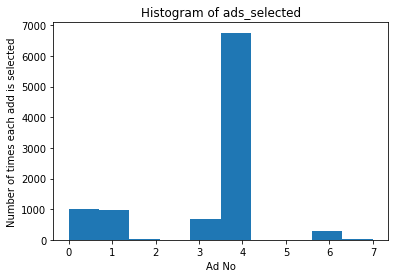

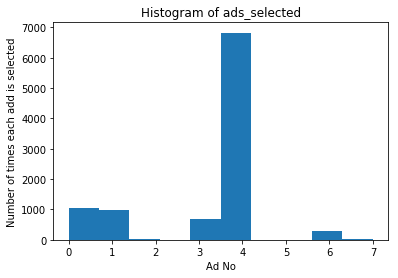

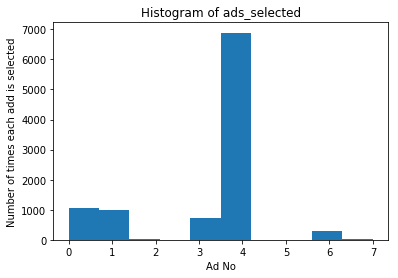

Counter({4: 6889, 0: 1049, 1: 990, 3: 710, 6: 301, 7: 36, 2: 25})
[[0, 1049], [1, 990], [2, 25], [3, 710], [4, 6889], [6, 301], [7, 36]]
12387


In [123]:
# This is an alteration on UCB which incorporates all data, not leaving out some. Select all actions

N = 10000
d = 10
ads_selected = []
numbers_of_selections = [0] * d
sums_of_rewards = [0] * d
total_reward = 0

data = dataset.sample(frac=1)

for n in range(0, N):
    ad = 0
    t_check = 0
    max_upper_bound = 0
    upper_bounds = [0] * d
    for i in range(0, d):
        numbers_of_selections[i] = numbers_of_selections[i] + 1
        reward = data.values[n, i]
        sums_of_rewards[i] = sums_of_rewards[i] + reward
        total_reward = total_reward + reward
        average_reward = sums_of_rewards[i] / numbers_of_selections[i]
        delta_i = math.sqrt(3/2 * (math.log(n + 1) / numbers_of_selections[i]))
        upper_bound = average_reward + delta_i
        upper_bounds[i] = upper_bound
        if upper_bound > max_upper_bound:
            max_upper_bound = upper_bound
            ad = i
    if np.random.uniform(0,1) >= 0.6:
        li = []
        sub = sorted(upper_bounds,reverse = True)
        for j,e in enumerate(upper_bounds):
            #print(j)
            #print(sorted(sums_of_rewards,reverse = True))
            if e >= sub[4]:
                li.append(j)
            if e == sub[1]:
                r = j
        li.remove(r)
            
        ad = int(np.random.choice(li))
    ads_selected.append(ad)
    if (n%100 == 0) or (n == 0):
        #plt.bar(x = range(0,10), height = ads_selected.count()) #histogram of number of times each ad is clicked
        plt.hist(ads_selected)
        plt.title('Histogram of ads_selected')
        plt.xlabel('Ad No')
        plt.ylabel('Number of times each add is selected')
        plt.show()
#Visualizing the result
plt.hist(ads_selected) #histogram of number of times each ad is clicked
plt.title('Histogram of ads_selected')
plt.xlabel('Ad No')
plt.ylabel('Number of times each add is selected')
plt.show()
from collections import Counter
print(Counter(ads_selected))
print([[x,ads_selected.count(x)] for x in set(ads_selected)])
#to view the reward
print(total_reward)

In [121]:
dataset.sum().values

array([1703, 1295,  728, 1196, 2695,  126, 1112, 2091,  952,  489],
      dtype=int64)

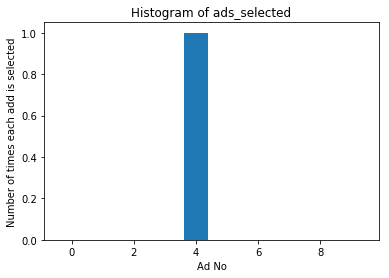

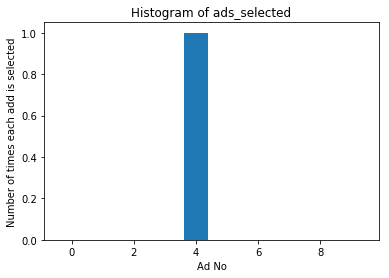

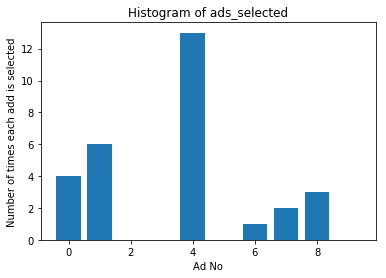

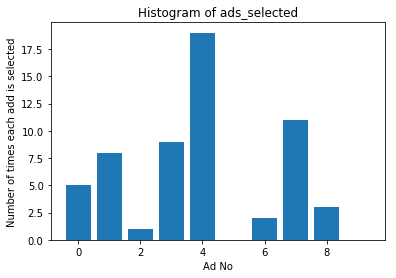

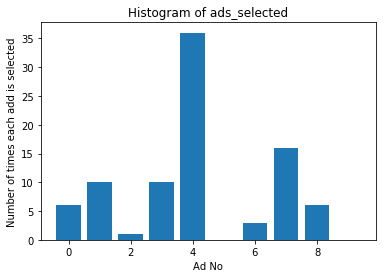

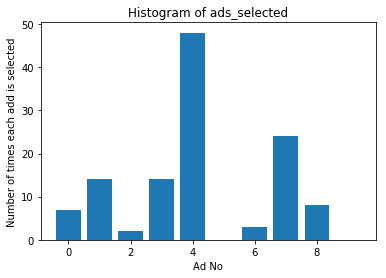

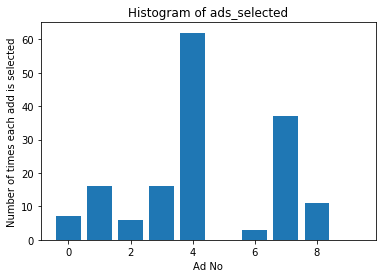

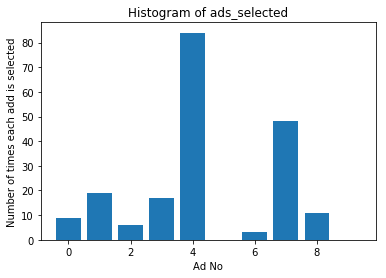

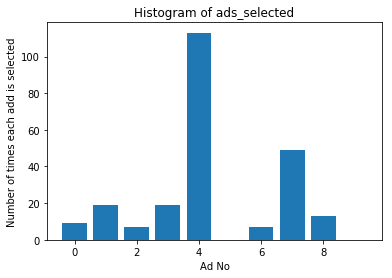

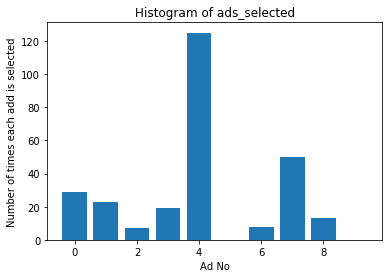

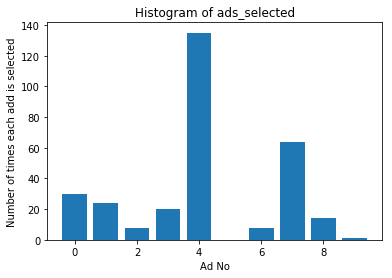

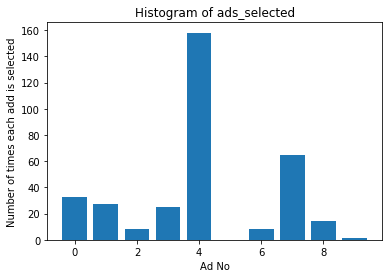

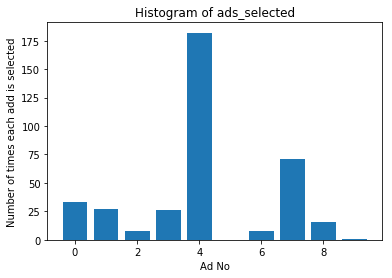

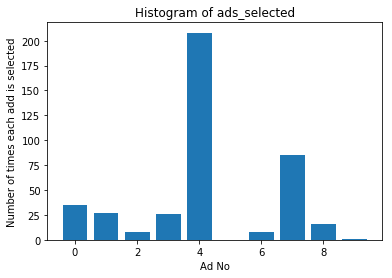

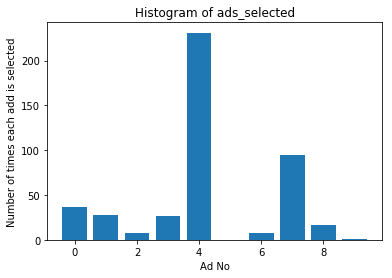

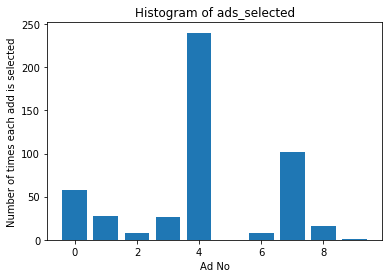

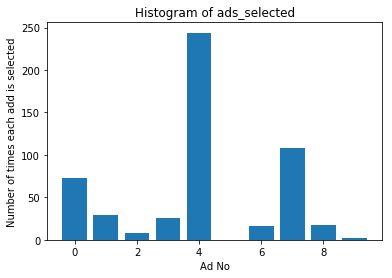

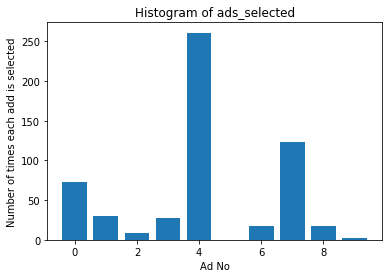

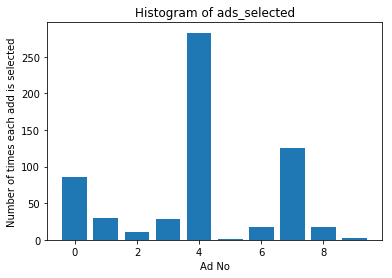

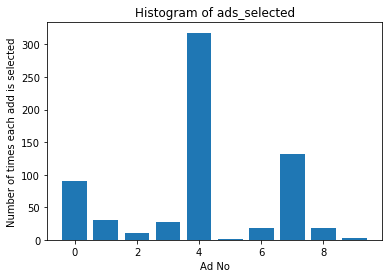

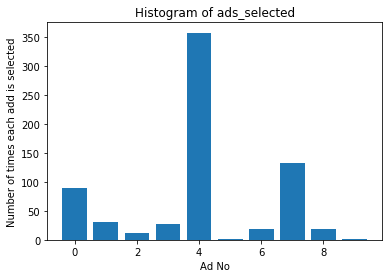

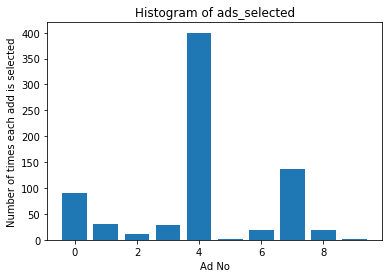

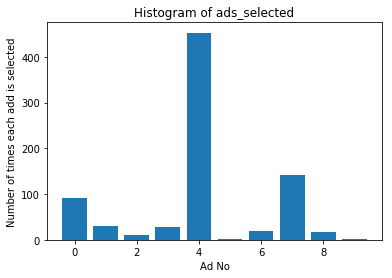

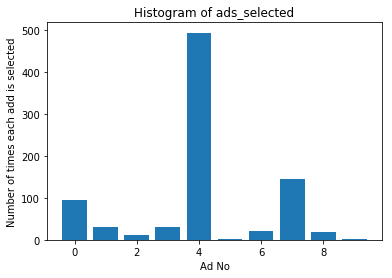

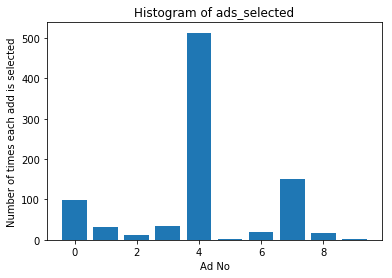

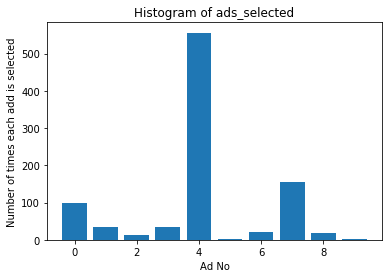

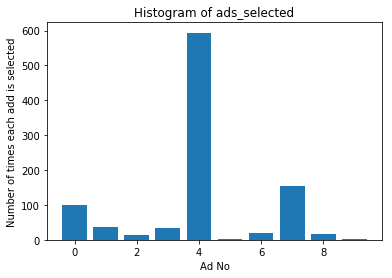

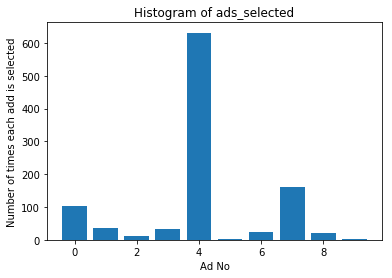

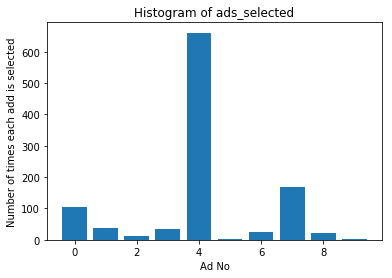

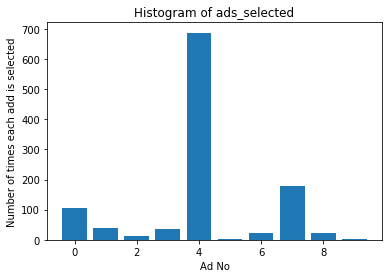

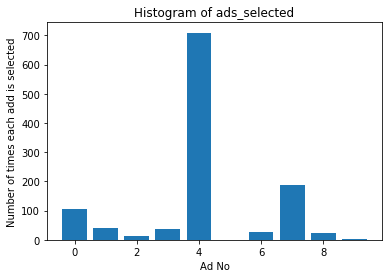

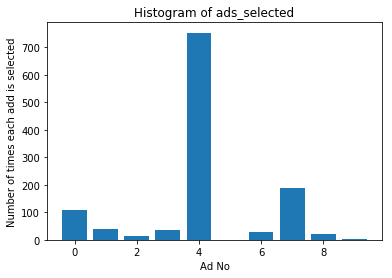

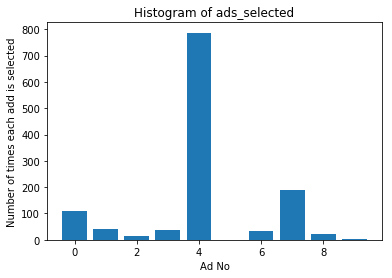

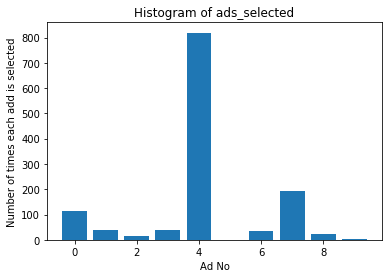

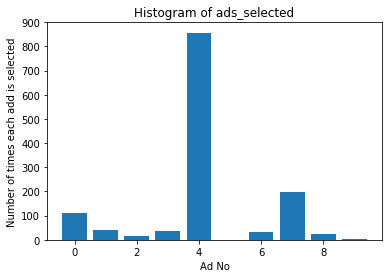

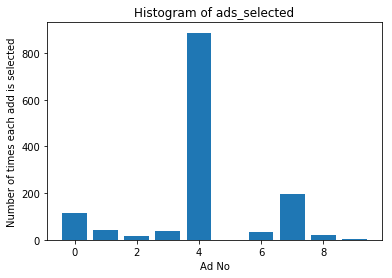

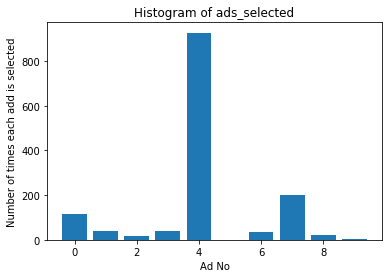

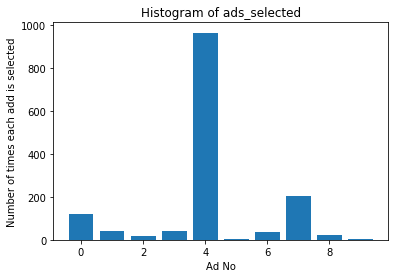

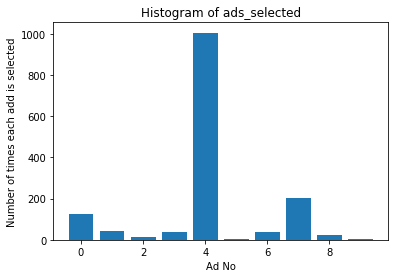

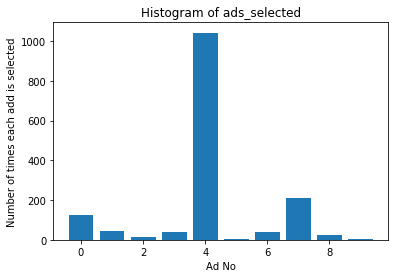

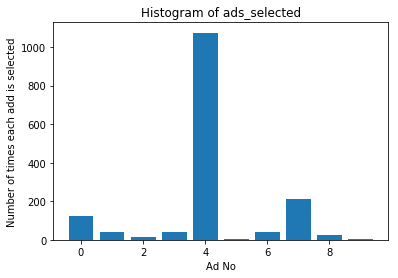

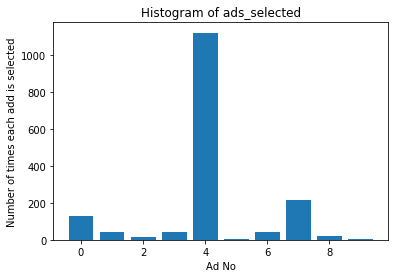

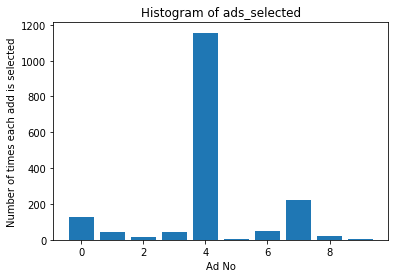

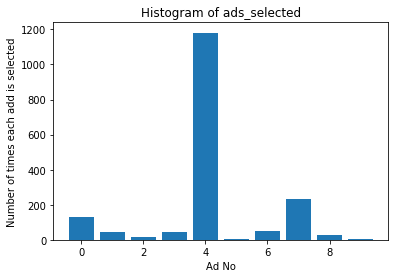

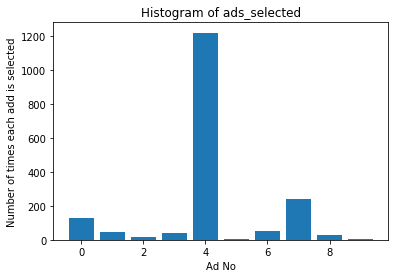

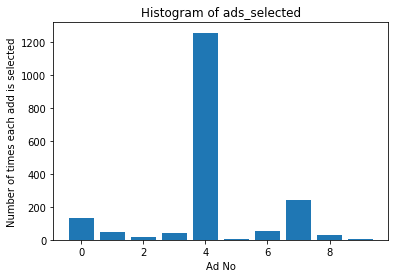

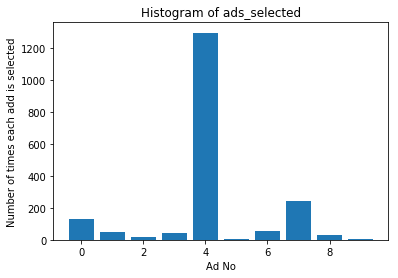

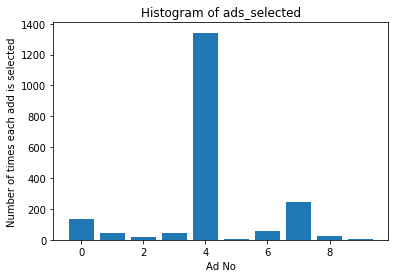

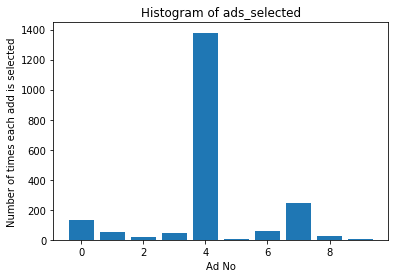

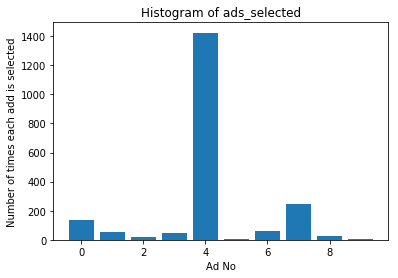

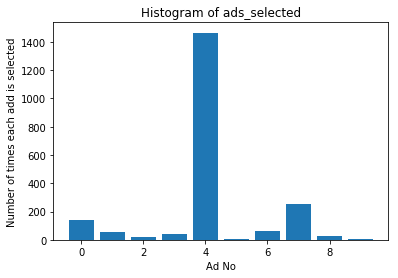

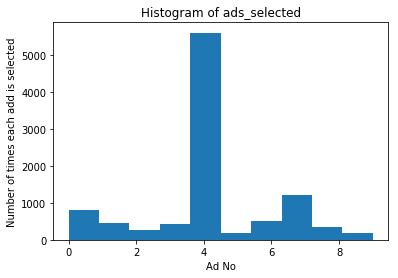

[[0, 807], [1, 466], [2, 276], [3, 421], [4, 5608], [5, 190], [6, 505], [7, 1217], [8, 337], [9, 173]]
2124


In [126]:
#UCB needs to be implemented from scratch without using any package, as there is no easy library to use.
# Select only chosen action


N = 10000
d = 10
ads_selected = []
numbers_of_selections = [0] * d
#number_of_selections = dataset.sum().values
sums_of_rewards = [0] * d
total_reward = 0

for n in range(0, N):
    ad = np.random.choice(range(0,10))
    max_upper_bound = 0
    upper_bounds = [0] * d
    for i in range(0, d):
        if numbers_of_selections[i] > 0:
            # 3 lines below is the algorithm shown above
            average_reward = sums_of_rewards[i] / numbers_of_selections[i]
            delta_i = math.sqrt(3/2 * math.log(n + 1) / numbers_of_selections[i])
            upper_bound = average_reward + delta_i
            upper_bounds[i] = upper_bound
        else:
            upper_bound = 1e400 #makes this large so that the first round gives every category a chance 
        if upper_bound > max_upper_bound:
            ad = i
            max_upper_bound = upper_bound
        #print(sorted(sums_of_rewards))
        #if upper_bound >= sorted(sums_of_rewards,reverse = True)[9]:
         #   if np.random.uniform(0,1) >= 0.05:
          #      ad = i
    if np.random.uniform(0,1) >= 0.66:
        li = []
        for j,e in enumerate(upper_bounds):
            #print(j)
            #print(sorted(sums_of_rewards,reverse = True))
            if e >= sorted(upper_bounds,reverse = True)[6]:
                li.append(j)
        #print(li)
        ad = int(np.random.choice(sorted(li,reverse = True)[1:]))
        
    ads_selected.append(ad)
    numbers_of_selections[ad] = numbers_of_selections[ad] + 1
    reward = dataset.values[n, ad]
    sums_of_rewards[ad] = sums_of_rewards[ad] + reward
    total_reward = total_reward + reward
    if (n%200 == 0) or (n == 11):
        plt.bar(x = range(0,10), height = sums_of_rewards) #histogram of number of times each ad is clicked
        plt.title('Histogram of ads_selected')
        plt.xlabel('Ad No')
        plt.ylabel('Number of times each add is selected')
        plt.show()
#Visualizing the result
plt.hist(ads_selected) #histogram of number of times each ad is clicked
plt.title('Histogram of ads_selected')
plt.xlabel('Ad No')
plt.ylabel('Number of times each add is selected')
plt.show()


print([[x,ads_selected.count(x)] for x in set(ads_selected)])
#to view the reward
print(total_reward)

In [75]:
w

[0]
